In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from math import log, e
from scipy import stats

In [46]:
def bsm(stock_price, strike_price, rate, time, volatility, dividend=0):

    d1 = (log(stock_price / strike_price) + (rate - dividend + volatility ** 2 / 2) * time) / (volatility * time ** .5)
    d2 = d1 - volatility * time ** .5

    call_option = stats.norm.cdf(d1) * stock_price * e ** (-dividend * time) - stats.norm.cdf(d2) * strike_price * e ** (
            -rate * time)

    return call_option

In [47]:
stockData = pd.read_csv('/Users/krylovalexey/Downloads/archive/stock_data.csv').sort_values('date')
test = stockData.query("ticker == 'sh600000' and date >= '2021-01-01' and date <= '2021-6-30'")
print(test)

            date    ticker  open  high   low  close      volume  \
3787  2021-01-04  sh600000  9.18  9.26  9.09   9.22  62906939.0   
3788  2021-01-05  sh600000  9.21  9.21  9.06   9.21  53859177.0   
3789  2021-01-06  sh600000  9.16  9.36  9.16   9.35  61881321.0   
3790  2021-01-07  sh600000  9.36  9.45  9.20   9.34  57090442.0   
3791  2021-01-08  sh600000  9.36  9.42  9.26   9.36  55801455.0   
...          ...       ...   ...   ...   ...    ...         ...   
4025  2021-12-27  sh600000  8.54  8.57  8.53   8.56  19527735.0   
4026  2021-12-28  sh600000  8.56  8.59  8.54   8.57  29833707.0   
4027  2021-12-29  sh600000  8.57  8.58  8.53   8.54  20050130.0   
4028  2021-12-30  sh600000  8.54  8.58  8.53   8.54  23272484.0   
4029  2021-12-31  sh600000  8.54  8.57  8.53   8.53  22929621.0   

      outstanding_share  turnover      pe  pe_ttm      pb      ps  ps_ttm  \
3787       2.935214e+10  0.002143  4.8280  5.1430  0.5574  1.4916  1.4734   
3788       2.935214e+10  0.001835  4.8230

In [48]:
first_day = test[0:1]
print(first_day.values)

[['2021-01-04' 'sh600000' 9.18 9.26 9.09 9.22 62906939.0 29352140893.0
  0.0021431806023731 4.828 5.143 0.5574 1.4916 1.4734 6.1919 6.1919
  28442217.9691 1.0]]


In [49]:
def get_mid(data):
    return (data['high'] + data['low']) / 2.0

In [50]:
my_stock_price = get_mid(first_day)
strike_price = 9.5
rf_rate = first_day['close'] * .01
volatility = 0.30
t = 0.5 # 6 месяцев
dividend = 0 # условно принимаем за 0
print(rf_rate.values)
print(f'浦发银行 цена закрытия акции: {my_stock_price.values} в первый день')

[0.0922]
浦发银行 цена закрытия акции: [9.175] в первый день


In [51]:
call_option = bsm(
    stock_price=my_stock_price.values,
    strike_price=strike_price,
    rate=rf_rate.values,
    time=t,
    volatility=volatility,
    dividend=dividend)

print(f'BSM оценка на 6 месяцев для 浦发银行 call опциона: ${1000 * call_option}')

BSM оценка на 6 месяцев для 浦发银行 call опциона: $[823.25344676]


In [57]:
my_holdings = my_stock_price.values * 1000
print(f'Текущий объем портфеля: {my_holdings}')

Текущий объем портфеля: [9175.]


In [58]:
premuium_yield = (call_option * 1000) / my_holdings

print(f'Премия за продажу покрытого колла составляет: {premuium_yield * 1000}')

Премия за продажу покрытого колла составляет: [89.7278961]


In [59]:
stock_price = get_mid(test)
cov_call = [(stock + call_option) * 1000 if (stock + call_option) * 1000 < (strike_price + call_option) * 1000 else (strike_price + call_option) * 1000 for
            stock in stock_price]
print(stock_price.values)
print(cov_call)
print(stock_price.size)

[ 9.175  9.135  9.26   9.325  9.34   9.335  9.22   9.33   9.385  9.59
  9.515  9.615  9.585  9.52   9.39   9.26   9.255  9.305  9.21   9.415
  9.7    9.815  9.755  9.77  10.03  10.15  10.125 10.19  10.355 10.42
 10.305 10.33  10.205 10.21  10.165 10.065 10.025 10.165 10.32  10.295
 10.345 10.26  10.195 10.34  10.4   10.53  10.59  10.48  10.45  10.285
 10.235 10.24  10.205 10.18  10.155  9.995 10.295 10.43  10.385 10.29
 10.22  10.15  10.12  10.075 10.12  10.23  10.18   9.99   9.98  10.04
 10.025 10.035  9.995  9.925  9.895  9.795  9.76   9.905  9.635  9.59
  9.585  9.495  9.505  9.625  9.605  9.63   9.72   9.7    9.65   9.615
  9.66   9.61   9.705  9.855  9.85   9.81   9.785  9.73   9.69   9.755
  9.79   9.745  9.76   9.785  9.76   9.705  9.595  9.59   9.59   9.565
  9.57   9.575  9.515  9.53   9.575  9.55   9.53   9.515  9.545  9.505
  9.43   9.47   9.51   9.505  9.475  9.465  9.46   9.41   9.41   9.54
  9.465  9.5    9.575  9.64   9.62   9.44   9.26   9.26   9.19   9.07
  9.105  9.09

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


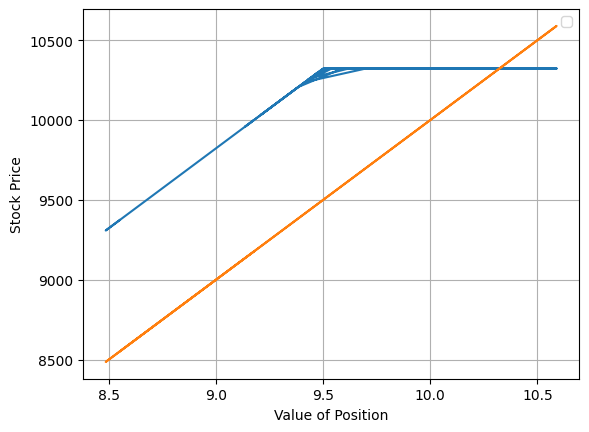

In [60]:
plt.plot(get_mid(test), cov_call)
plt.plot(stock_price, stock_price * 1000)

plt.xlabel('Value of Position')
plt.ylabel('Stock Price')
plt.grid()
plt.legend();